# 🌳📱 User Behaviour Classification using Random Forest 🌳

In this notebook, we apply the **Random Forest Classifier** to predict user behaviour based on mobile usage patterns. The model is trained and evaluated to understand its performance and decision boundaries.

---

📌 **Steps Covered in this Notebook:**
- 📂 Load and preprocess the dataset
- 🔍 Exploratory Data Analysis (EDA)
- ✂️ Feature selection
- 🌳 Train Random Forest model
- 📊 Accuracy and classification report
- 🧭 Visualize decision boundary


## 1. Import necessary Libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import sklearn 

## 2. Load datset

In [2]:
df = pd.read_csv('/kaggle/input/mobile-device-usage-and-user-behavior-dataset/user_behavior_dataset.csv')

In [3]:
df

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3
...,...,...,...,...,...,...,...,...,...,...,...
695,696,iPhone 12,iOS,92,3.9,1082,26,381,22,Male,2
696,697,Xiaomi Mi 11,Android,316,6.8,1965,68,1201,59,Male,4
697,698,Google Pixel 5,Android,99,3.1,942,22,457,50,Female,2
698,699,Samsung Galaxy S21,Android,62,1.7,431,13,224,44,Male,1


## 3. information about the  Dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB


In [6]:
df['Device Model'].unique()

array(['Google Pixel 5', 'OnePlus 9', 'Xiaomi Mi 11', 'iPhone 12',
       'Samsung Galaxy S21'], dtype=object)

In [7]:
df['Device Model'].nunique()

5

In [8]:
df['Operating System'].unique()

array(['Android', 'iOS'], dtype=object)

## 4. EDA Exploratory data Analysis

### Distribution among columns 

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


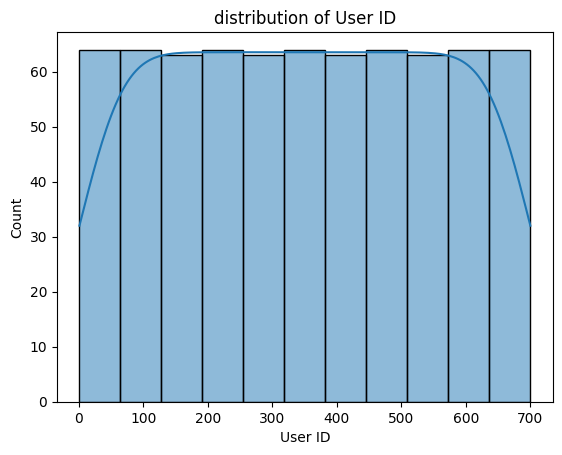

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


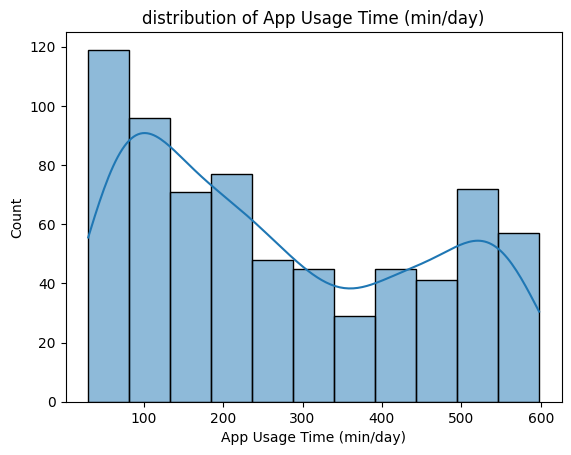

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


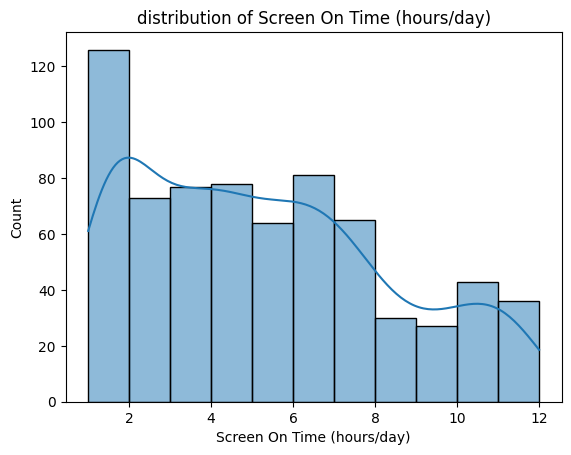

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


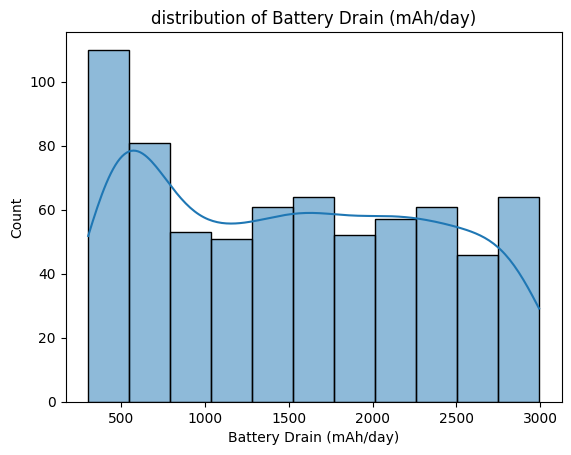

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


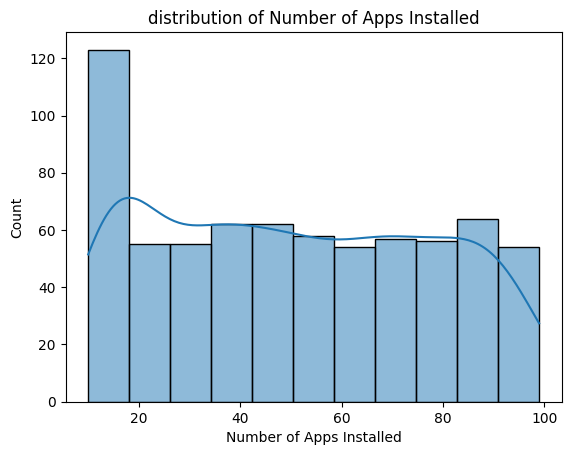

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


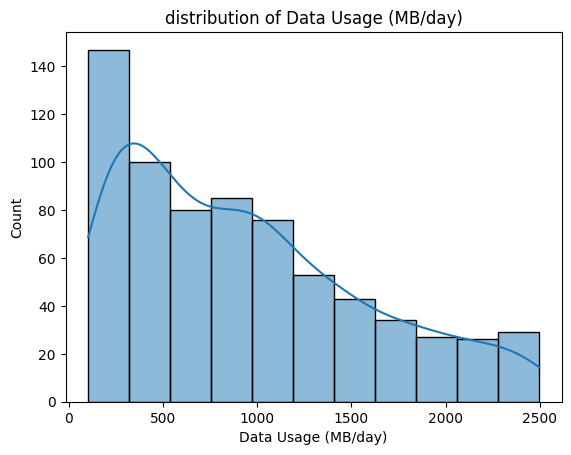

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


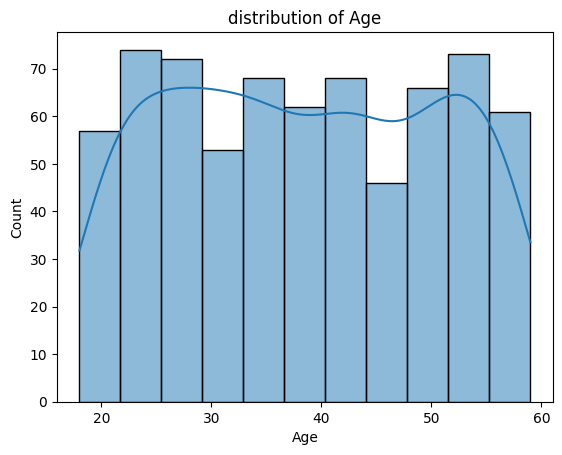

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


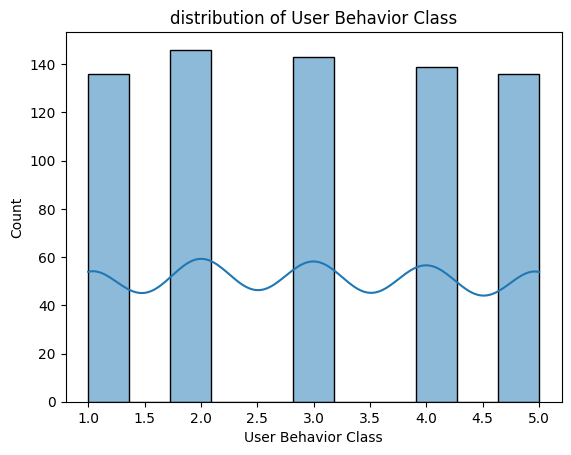

In [9]:
df_numeric = df.select_dtypes(include = 'number')
for col in df_numeric:
    sns.histplot(df[col],kde = True)
    plt.title(f'distribution of {col}')
    plt.show()

### Correlation 

In [98]:
corr_matrix = df_numeric.corr()  # Only numeric columns


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


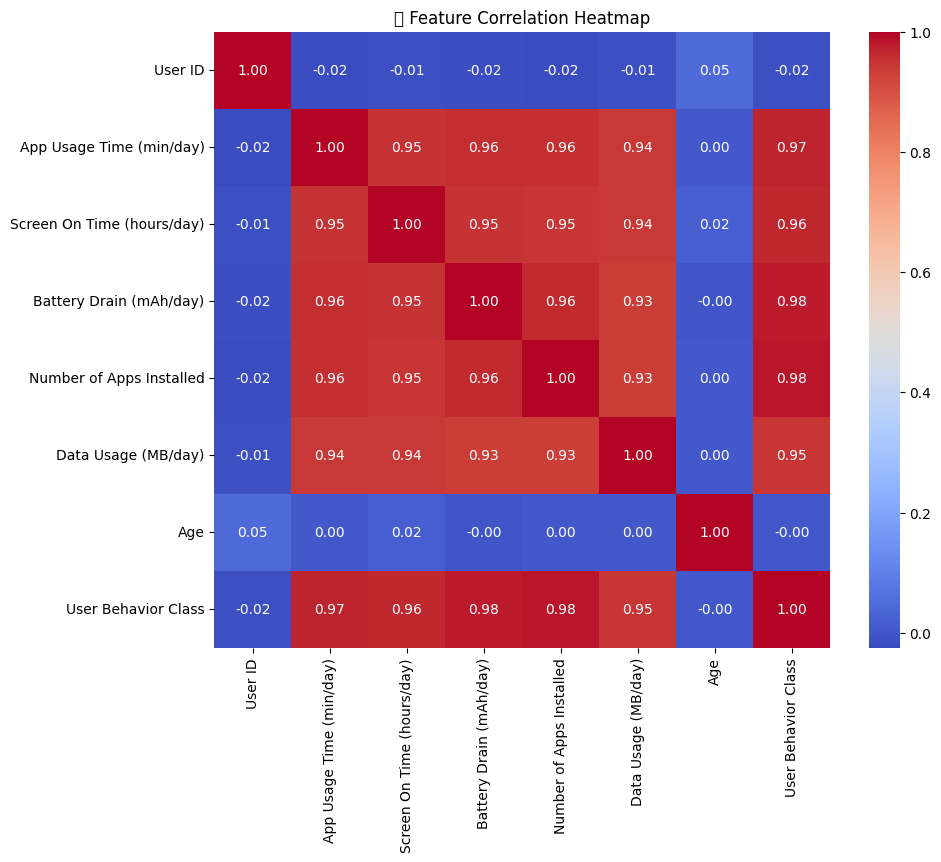

In [99]:
plt.figure(figsize=(10, 8))  # You can adjust the figure size
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("🔍 Feature Correlation Heatmap")
plt.show()


### Relation between numerical and categorical columns

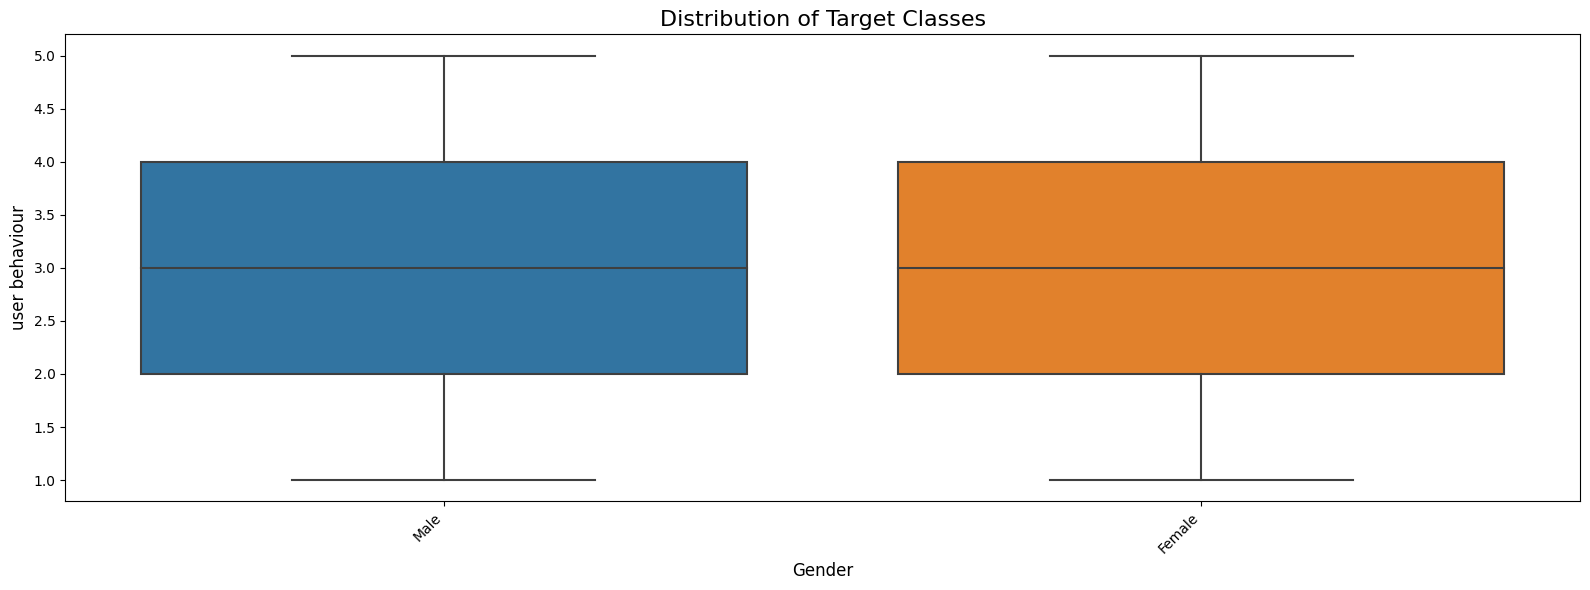

In [15]:
plt.figure(figsize=(16, 6))
sns.boxplot(x='Gender', y='User Behavior Class', data=df)
plt.title('Distribution of Target Classes', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('user behaviour', fontsize=12)

plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Prevent label cutoff

plt.show()


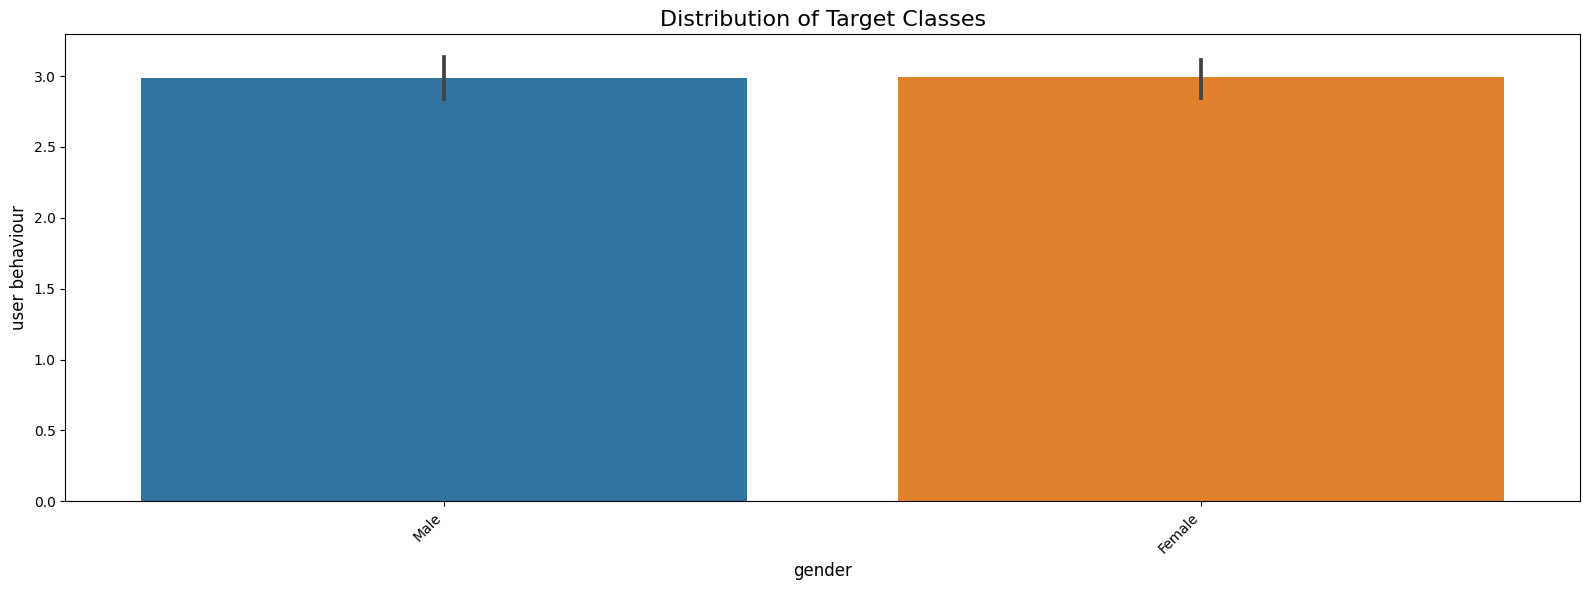

In [16]:
plt.figure(figsize=(16, 6))
sns.barplot(x='Gender', y='User Behavior Class', data=df)
plt.title('Distribution of Target Classes', fontsize=16)
plt.xlabel('gender', fontsize=12)
plt.ylabel('user behaviour', fontsize=12)

plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Prevent label cutoff

plt.show()


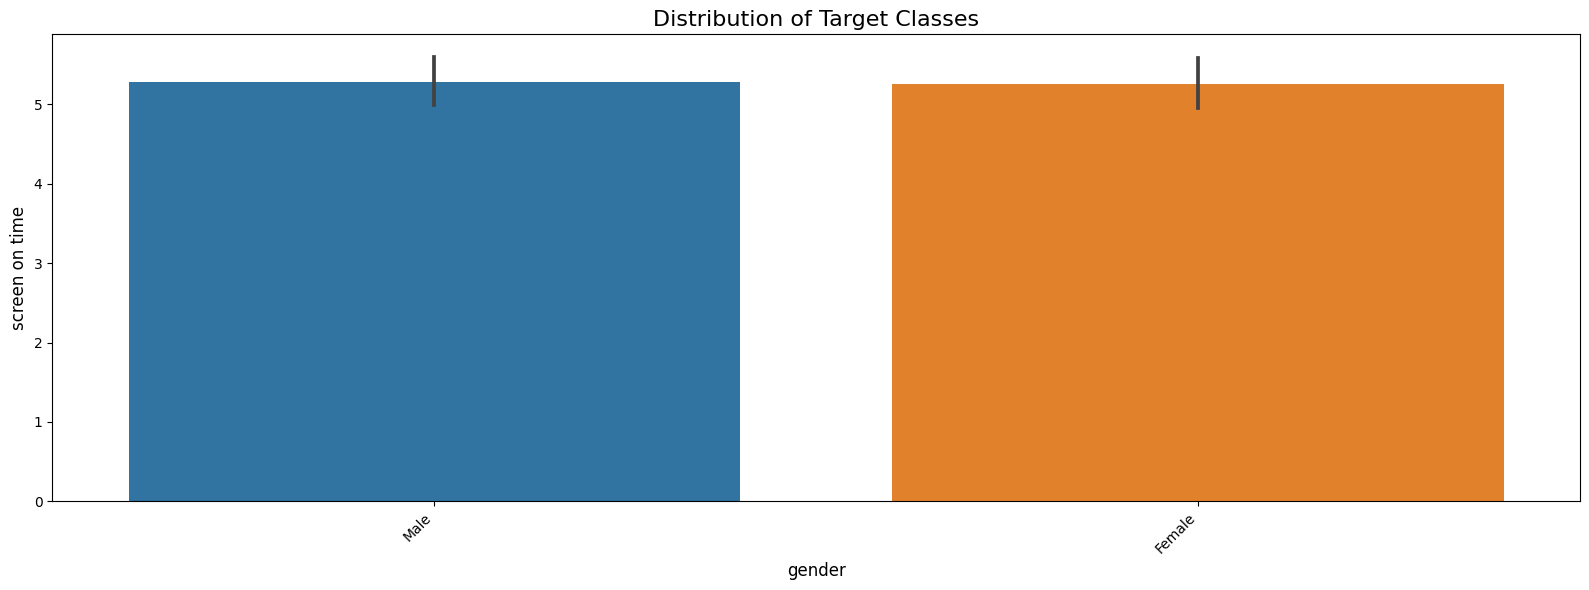

In [20]:
plt.figure(figsize=(16, 6)) 
sns.barplot(x='Gender',y ='Screen On Time (hours/day)', data=df)
plt.title('Distribution of Target Classes', fontsize=16)
plt.xlabel('gender', fontsize=12)
plt.ylabel('screen on time', fontsize=12)

plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Prevent label cutoff

plt.show()

## 5. import necessary libraries

In [25]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

## 6. Separate x and ycolumns

In [54]:
X = df.iloc[:,0:10]
y = df.iloc[:,-1]

In [55]:
X_train,X_test,y_train,y_test = train_test_split (X,y,test_size = 0.2,random_state = 42)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Device Model                700 non-null    object 
 1   Operating System            700 non-null    object 
 2   App Usage Time (min/day)    700 non-null    int64  
 3   Screen On Time (hours/day)  700 non-null    float64
 4   Battery Drain (mAh/day)     700 non-null    int64  
 5   Number of Apps Installed    700 non-null    int64  
 6   Data Usage (MB/day)         700 non-null    int64  
 7   Age                         700 non-null    int64  
 8   Gender                      700 non-null    object 
 9   User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 54.8+ KB


## 7. encode the variable 

In [63]:
numeric_cols = ['App Usage Time (min/day)','Screen On Time (hours/day)','Battery Drain (mAh/day)','Number of Apps Installed',
               'Data Usage (MB/day)','Age']
categoric_cols = ['Device Model','Operating System','Gender']

In [64]:
one_hot = OneHotEncoder(handle_unknown = 'ignore',drop = 'first')
scaler = StandardScaler()


In [65]:
preprocessor = ColumnTransformer(
    transformers=[
        ("onehot",one_hot,categoric_cols),
        ("scaler",scaler,numeric_cols),
    ])

In [87]:
rf = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=20)

## 8. Using Pipeline for fit 

In [88]:
pipeline = Pipeline([
    ('preprocessor',preprocessor),
    ('rf',rf)
])

In [89]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('onehot',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['Device Model',
                                                   'Operating System',
                                                   'Gender']),
                                                 ('scaler', StandardScaler(),
                                                  ['App Usage Time (min/day)',
                                                   'Screen On Time (hours/day)',
                                                   'Battery Drain (mAh/day)',
                                                   'Number of Apps Installed',
                                                   'Data Usage (MB/day)',
                                                   'Age'])])),
                ('rf', RandomForestClassifier(max_depth=20))])

In [90]:
y_pred = pipeline.predict(X_test)

## 9. Check Accuracy score

In [91]:
from sklearn.metrics import classification_report,accuracy_score

In [92]:
print(accuracy_score(y_test,y_pred))

1.0


In [93]:
y_train_pred = pipeline.predict(X_train)

In [94]:
print(accuracy_score(y_train,y_train_pred))

1.0


In [95]:
print(X_train.shape, X_test.shape)


(560, 10) (140, 10)


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Device Model                700 non-null    object 
 1   Operating System            700 non-null    object 
 2   App Usage Time (min/day)    700 non-null    int64  
 3   Screen On Time (hours/day)  700 non-null    float64
 4   Battery Drain (mAh/day)     700 non-null    int64  
 5   Number of Apps Installed    700 non-null    int64  
 6   Data Usage (MB/day)         700 non-null    int64  
 7   Age                         700 non-null    int64  
 8   Gender                      700 non-null    object 
 9   User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 54.8+ KB


## 10. Plot Decision Boundary

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


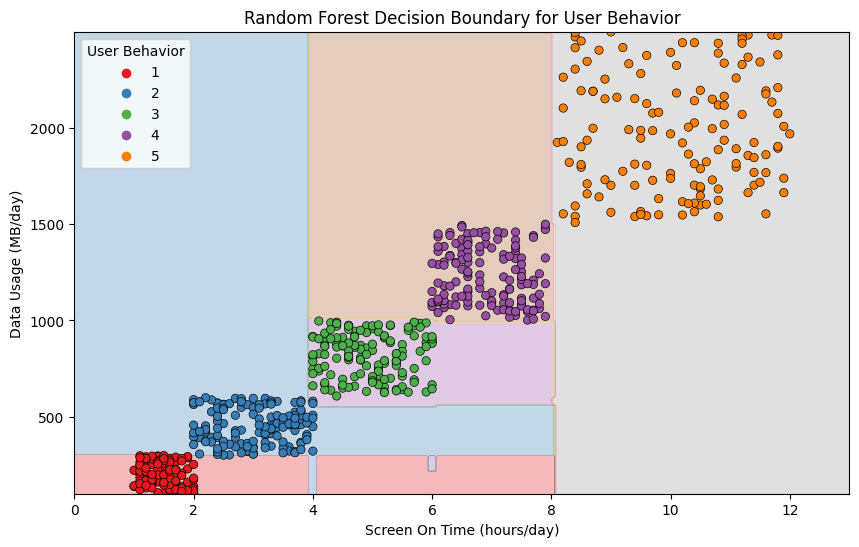

In [97]:
df = df.drop(columns=['User ID'], errors='ignore')

# Step 3: Choose two important numerical features for 2D plotting
feature_1 = 'Screen On Time (hours/day)'       # Replace if needed
feature_2 = 'Data Usage (MB/day)'      # Replace if needed
target = 'User Behavior Class'        # Target column

X = df[[feature_1, feature_2]]
y = df[target]

# Step 4: Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 6: Create mesh grid for decision boundary
x_min, x_max = X[feature_1].min() - 1, X[feature_1].max() + 1
y_min, y_max = X[feature_2].min() - 1, X[feature_2].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Step 7: Plotting
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='Set1')
sns.scatterplot(x=X[feature_1], y=X[feature_2], hue=y, palette='Set1', edgecolor='k')
plt.title("Random Forest Decision Boundary for User Behavior")
plt.xlabel(feature_1)
plt.ylabel(feature_2)
plt.legend(title='User Behavior')
plt.show()